Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


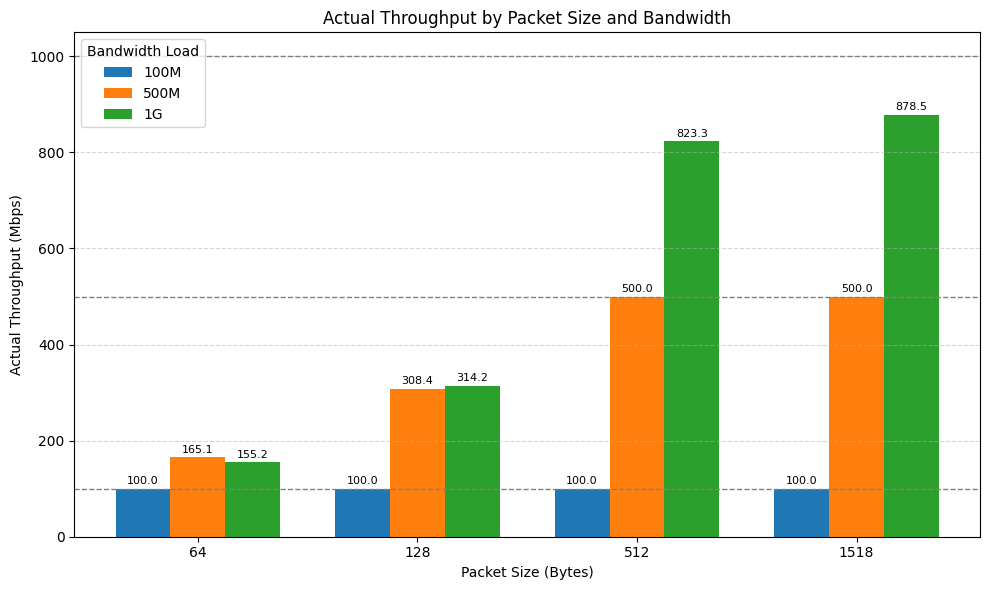

In [2]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
# Configuration
base_path = "/content/drive/MyDrive/Test files/VM/throughput"
bandwidths = ["100M", "500M", "1G"]
packet_sizes = ["64", "128", "512", "1518"]
#colors = ['blue', 'orange', 'green']  # One color per bandwidth

# Prepare data structure: packet_size -> [values for each bandwidth]
data = {pkt: [] for pkt in packet_sizes}

# Extract throughput data
for pkt in packet_sizes:
    for bw in bandwidths:
        filename = f"iperf_{bw}_{pkt}B.json"
        file_path = os.path.join(base_path, filename)
        if os.path.exists(file_path):
            with open(file_path, "r") as f:
                result = json.load(f)
                bps = result['end']['sum_received']['bits_per_second']
                mbps = bps / 1e6
                data[pkt].append(mbps)
        else:
            print(f"⚠️ File not found: {file_path}")
            data[pkt].append(0)

# Plot settings
x = np.arange(len(packet_sizes))  # Packet size positions
bar_width = 0.25

plt.figure(figsize=(10, 6))

for i, bw in enumerate(bandwidths):
    values = [data[pkt][i] for pkt in packet_sizes]
    bars = plt.bar(x + i * bar_width, values, width=bar_width, label=f"{bw}")

    # Add labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{height:.1f}',
                 ha='center', va='bottom', fontsize=8)

# Add horizontal dashed lines at 100M, 500M, and 1G
for y in [100, 500, 1000]:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=1)
    #plt.text(len(packet_sizes) - 0.3, y + 10, f"{y} Mbps", color='gray', fontsize=8, ha='right')

# Axis formatting
plt.xticks(x + bar_width, packet_sizes)
plt.xlabel("Packet Size (Bytes)")
plt.ylabel("Actual Throughput (Mbps)")
plt.title("Actual Throughput by Packet Size and Bandwidth")
plt.legend(title="Bandwidth Load")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, 1050)

plt.tight_layout()
plt.show()
